In [2]:
import random, csv
import matplotlib.pyplot as plt

In [3]:
def game(ra, rb):
    p = ra/(ra+rb) #Probability that A wins a point
    #Initialises the variables
    raScore = 0
    rbScore = 0
    gameIncomplete = True
    #Has to have a score equal or larger than 11 and a difference of 2 for the game to end
    while not ((raScore >= 11 and raScore >= (rbScore + 2)) or (rbScore >= 11 and rbScore >= (raScore + 2))):
        r = random.random()
        if r < p:
            raScore += 1
        else:
            rbScore += 1
    return (raScore, rbScore)

In [4]:
random.seed(57)
print(game(70, 30))

(11, 5)


In [5]:
def winProbability(ra, rb, n):
    #Initialises the variables
    raWins = 0
    rbWins = 0
    gamesPlayed = 0
    while gamesPlayed < n: #Loops for a set number of games taken as a parameter
        result = game(ra, rb)
        if result[0] > result[1]:
            raWins += 1
            gamesPlayed += 1
        else:
            rbWins += 1
            gamesPlayed += 1
    probability = raWins/n # Calculates the probability
    return "{0:.2f}".format(probability) #Formats the result to 2 decimal places

In [6]:
print(winProbability(70, 30, 500))

0.98


In [7]:
def readCSV(file):
    #Initialises the variables
    abilitysList = []
    abilitysReturn = []
    #Opens the csv file
    with open(file) as csvfile:
        rdr = csv.reader(csvfile)
        for row in rdr: #Loops through each line
            abilitysList.append(row)
        abilitysList = abilitysList[1:] #Removes the initial line
    for x in abilitysList:
        x = x[:-1] #Removes the blank value from the end of the list
        abilityTemp = []
        for value in x:
            abilityTemp.append(int(value))
        abilitysReturn.append(tuple(abilityTemp)) #Adds the integer vales as tuples to a list
    return abilitysReturn

In [8]:
print(readCSV('test.csv'))

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]


In [9]:
def plotGraph(file):
    #Initialises the variables
    games = readCSV(file)
    resultsY = []
    resultsX = []
    for game in games:
        #Plots the graph/ Retrives the data
        resultsY.append(float(winProbability(game[0], game[1], 100)))
        resultsX.append(game[0]/game[1])
        resultsXSort = sorted(resultsX)
        resultsYSort = sorted(resultsY)
    #Draws and sets the labels on the graph
    plt.plot(resultsXSort, resultsYSort)
    plt.ylabel('Probability that player A beats player B')
    plt.xlabel("Ra/Rb (Player A's ability divided by Player B's ability)")
    plt.show()

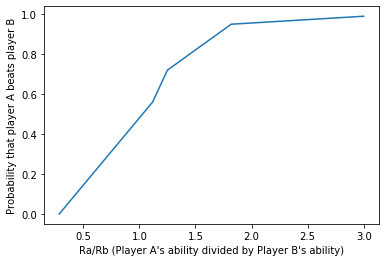

In [10]:
plotGraph('test.csv')